# 영역 구하기

## 문제

* 눈금의 간격이 1인 M×N(M,N≤100)크기의 모눈종이가 있다. 이 모눈종이 위에 눈금에 맞추어 K개의 직사각형을 그릴 때, 이들 K개의 직사각형의 내부를 제외한 나머지 부분이 몇 개의 분리된 영역으로 나누어진다.

* 예를 들어 M=5, N=7 인 모눈종이 위에 <그림 1>과 같이 직사각형 3개를 그렸다면, 그 나머지 영역은 <그림 2>와 같이 3개의 분리된 영역으로 나누어지게 된다.

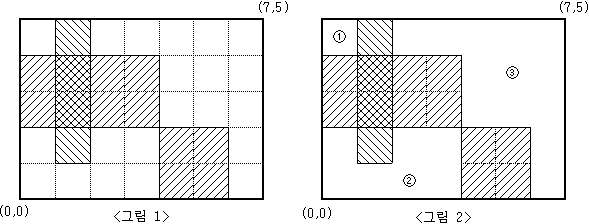

In [1]:
from IPython.display import Image
Image('../image/2583_영역 구하기.png', width = 800)

* <그림 2>와 같이 분리된 세 영역의 넓이는 각각 1, 7, 13이 된다.

* M, N과 K 그리고 K개의 직사각형의 좌표가 주어질 때, K개의 직사각형 내부를 제외한 나머지 부분이 몇 개의 분리된 영역으로 나누어지는지, 그리고 분리된 각 영역의 넓이가 얼마인지를 구하여 이를 출력하는 프로그램을 작성하시오.

## 입력

* 첫째 줄에 M과 N, 그리고 K가 빈칸을 사이에 두고 차례로 주어진다. M, N, K는 모두 100 이하의 자연수이다. 둘째 줄부터 K개의 줄에는 한 줄에 하나씩 직사각형의 왼쪽 아래 꼭짓점의 x, y좌표값과 오른쪽 위 꼭짓점의 x, y좌표값이 빈칸을 사이에 두고 차례로 주어진다. 모눈종이의 왼쪽 아래 꼭짓점의 좌표는 (0,0)이고, 오른쪽 위 꼭짓점의 좌표는(N,M)이다. 입력되는 K개의 직사각형들이 모눈종이 전체를 채우는 경우는 없다.

## 출력

* 첫째 줄에 분리되어 나누어지는 영역의 개수를 출력한다. 둘째 줄에는 각 영역의 넓이를 오름차순으로 정렬하여 빈칸을 사이에 두고 출력한다.

## Code

In [2]:
# 2583 영역 구하기(bfs)
import sys
from collections import deque

def bfs(y, x, M, N):
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]    
    global graph
    queue = deque()
    queue.append((y, x))
    graph[y][x] = 1
    count = 1
    while queue:
        y, x = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if (0 <= nx < N) and (0 <= ny < M):
                if graph[ny][nx] == 0:
                    graph[ny][nx] = 1
                    queue.append((ny, nx))
                    count += 1
            else:
                continue

    return count

def solution():
    M, N, K = map(int, input().split())
    # M, N, K = map(int, sys.stdin.readline().split())
    points = [] 
    for _ in range(K):
        s_x, s_y, e_x, e_y = map(int, input().split())
        # s_x, s_y, e_x, e_y = map(int, sys.stdin.readline().split())
        height = abs(s_y - e_y)
        points.append([(M-s_y-height, s_x), (M-e_y+height, e_x)])

    global graph
    graph = [[0]*N for _ in range(M)]

    for point in points:
        start, end = point
        for i in range(start[0], end[0]):
            for j in range(start[1], end[1]):
                graph[i][j] = 1


    area = [] 
    for i in range(N):
        for j in range(M):
            if graph[j][i] == 0:
                area.append(bfs(j, i, M, N))
    print(len(area))
    print(*sorted(area), end=' ')

In [ ]:
import sys
sys.setrecursionlimit(100000)

def dfs(y, x, M, N):
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    global count
    global graph
    count += 1    
    graph[y][x] = 1

    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if (0 <= nx < N) and (0 <= ny < M):
            if graph[ny][nx] == 0:
                dfs(ny, nx, M, N)

def solution():
    M, N, K = map(int, input().split())
    # M, N, K = map(int, sys.stdin.readline().split())
    points = [] 
    for _ in range(K):
        s_x, s_y, e_x, e_y = map(int, input().split())
        # s_x, s_y, e_x, e_y = map(int, sys.stdin.readline().split())
        height = abs(s_y - e_y)
        points.append([(M-s_y-height, s_x), (M-e_y+height, e_x)])
    
    global graph
    graph = [[0]*N for _ in range(M)]

    for point in points:
        start, end = point
        for i in range(start[0], end[0]):
            for j in range(start[1], end[1]):
                graph[i][j] = 1

    area = []
    count = 0 
    for i in range(N):
        for j in range(M):
            if graph[j][i] == 0:
                dfs(j, i, M, N)
                area.append(count)
                count = 0

    print(len(area))
    print(*sorted(area), end=' ')

## 예제입력

In [3]:
solution()

3
1 7 13 

* 1. 가로(x)와 세로(y)길이 만큼 1으로 채워진 2차원 List를 만든다.
* 2. 원점(0, 0)이 좌측 하단으로 되어 있어, Index을 용이하게 하기 위해 (0, 5)를 원점(0, 0)으로 해서 좌표를 새로 계산한다.
* 3. 주어지는 왼쪽 아래 꼭지점의 x,y와 오른쪽 위 꼭지점의 x,y로 왼쪽 위 꼭지점의 x,y와 오른쪽 아래 꼭지점의 x,y를 계산한다(좌표로 Indexing을 위해서)
* 4. 왼쪽 위 꼭지점의 x,y와 오른쪽 아래 꼭지점의 x,y의 좌표를 이용하여 K개의 직사각형 내부에 해당하는 위치를 1로 표시한다.

# BFS
* 5. queue 이용하여 0인 부분을 만나면 인접한 모든 0을 찾아서 1로 바꾸는 함수인 bfs를 작성한다.
    * 1\) 우, 좌, 하, 상 순서대로 조건에 맞는(0 인) 좌표를 queue에 저장한 후, 해당 좌표의 값을 1로 바꾸고 더 이상 해당되는 좌표가 없을 때까지 작업을 반복
* 6. bfs를 이용하여 0을 1로 바꾸는 작업을 할 때마다 count에 1을 더해 횟수를 세어주어 0인 부분의 면적을 구한다

## Note

https://www.acmicpc.net/problem/2583